In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import datetime

In [2]:
data = pd.read_excel('/Users/fredericweiss/Documents/Konto_2024.xlsm', [0,1,5,7])

In [3]:
accounts = data[0]
booked = data[1]
forecast = data[5]
planned = data[7]
booked = booked[booked['Datum'].notna()]

In [206]:
booked

,Beleg Nr.,Datum,Konto,St0,St7,St19,Bezeichnung,Betrag+/-,Geldvermögen,Gewinn 2024,KSK,VoBa,TG,SB,Stand KsK,Stand VoBa,Stand TG,Stand SB,Kommentare
0,0,2024-01-01,NaN,NaN,NaN,NaN,Vortrag zum 01.01.2024,NaN,79829.11,0.00,NaN,NaN,NaN,NaN,10649.27,12320.21,26859.63,30000.0,NaN
1,1,2024-01-02,41.0,NaN,NaN,NaN,Einbruch- und Diebstahlversicherung,-35.05,79794.06,-35.05,NaN,1.0,NaN,NaN,10649.27,12285.16,26859.63,30000.0,NaN
2,2,2024-01-02,52.0,NaN,NaN,NaN,Habenzinsen Tagesgeld,0.01,79794.07,-35.04,NaN,NaN,1.0,NaN,10649.27,12285.16,26859.64,30000.0,"Nicht auf Kontoauszügen, da Tagesgeldkonto"
3,3,2024-01-08,807.0,NaN,NaN,NaN,Vorverkauf Helge Thun,380.00,80174.07,344.96,1.0,NaN,NaN,NaN,11029.27,12285.16,26859.64,30000.0,NaN
4,4,2024-01-11,601.0,NaN,NaN,NaN,Zahlung SchwimmFidel,1800.00,81974.07,2144.96,1.0,NaN,NaN,NaN,12829.27,12285.16,26859.64,30000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,179,2024-09-12,601.0,NaN,NaN,NaN,Zuschuss Schwimmfidel,1500.00,89654.11,9825.00,1.0,NaN,NaN,NaN,25233.65,6996.67,26858.79,30000.0,NaN
180,180,2024-09-12,67.0,NaN,NaN,NaN,Teilnahmegebühren Swim and Run Ehrets,-40.00,89614.11,9785.00,1.0,NaN,NaN,NaN,25193.65,6996.67,26858.79,30000.0,NaN
181,181,2024-09-12,32.0,NaN,NaN,NaN,Spende Teilnahmegebühren Ehrets,40.00,89654.11,9825.00,1.0,NaN,NaN,NaN,25233.65,6996.67,26858.79,30000.0,NaN
182,182,2024-09-16,67.0,NaN,NaN,NaN,Teilnahmegebühren Swim and Run Team Schmidgall,-40.00,89614.11,9785.00,1.0,NaN,NaN,NaN,25193.65,6996.67,26858.79,30000.0,NaN


Spendungs by account

In [139]:
accounts_ideell = [31, 32, 35, 36, 39, 41, 42, 44, 47]
accounts_vermögen = [51, 52, 53, 55, 56]
accounts_zweck = [601, 605, 607, 608, 701, 709, 61, 65, 67, 68, 71, 79]
accounts_wirtschaftlich = [806, 807, 809, 87, 88]

In [202]:
booked

,Beleg Nr.,Datum,Konto,St0,St7,St19,Bezeichnung,Betrag+/-,Geldvermögen,Gewinn 2024,KSK,VoBa,TG,SB,Stand KsK,Stand VoBa,Stand TG,Stand SB,Kommentare
0,0,2024-01-01,NaN,NaN,NaN,NaN,Vortrag zum 01.01.2024,NaN,79829.11,0.00,NaN,NaN,NaN,NaN,10649.27,12320.21,26859.63,30000.0,NaN
1,1,2024-01-02,41.0,NaN,NaN,NaN,Einbruch- und Diebstahlversicherung,-35.05,79794.06,-35.05,NaN,1.0,NaN,NaN,10649.27,12285.16,26859.63,30000.0,NaN
2,2,2024-01-02,52.0,NaN,NaN,NaN,Habenzinsen Tagesgeld,0.01,79794.07,-35.04,NaN,NaN,1.0,NaN,10649.27,12285.16,26859.64,30000.0,"Nicht auf Kontoauszügen, da Tagesgeldkonto"
3,3,2024-01-08,807.0,NaN,NaN,NaN,Vorverkauf Helge Thun,380.00,80174.07,344.96,1.0,NaN,NaN,NaN,11029.27,12285.16,26859.64,30000.0,NaN
4,4,2024-01-11,601.0,NaN,NaN,NaN,Zahlung SchwimmFidel,1800.00,81974.07,2144.96,1.0,NaN,NaN,NaN,12829.27,12285.16,26859.64,30000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,179,2024-09-12,601.0,NaN,NaN,NaN,Zuschuss Schwimmfidel,1500.00,89654.11,9825.00,1.0,NaN,NaN,NaN,25233.65,6996.67,26858.79,30000.0,NaN
180,180,2024-09-12,67.0,NaN,NaN,NaN,Teilnahmegebühren Swim and Run Ehrets,-40.00,89614.11,9785.00,1.0,NaN,NaN,NaN,25193.65,6996.67,26858.79,30000.0,NaN
181,181,2024-09-12,32.0,NaN,NaN,NaN,Spende Teilnahmegebühren Ehrets,40.00,89654.11,9825.00,1.0,NaN,NaN,NaN,25233.65,6996.67,26858.79,30000.0,NaN
182,182,2024-09-16,67.0,NaN,NaN,NaN,Teilnahmegebühren Swim and Run Team Schmidgall,-40.00,89614.11,9785.00,1.0,NaN,NaN,NaN,25193.65,6996.67,26858.79,30000.0,NaN


In [201]:
df = pd.DataFrame()
df['Konto'] = accounts_ideell
df = pd.merge(df, planned, on='Konto', how='left')
df = pd.merge(df, booked.loc[:,['Konto','Betrag+/-']].dropna().groupby(['Konto'], as_index=False).sum(), on='Konto', how='left')

df.drop(['Vorzeichen', 'Konto'], axis=1, inplace=True)
df = df.rename(columns={'Betrag+/-': 'Ist'})
df.index = accounts_ideell
df = df.fillna(0)

df['Diff'] = (df.Plan - df.Ist) * (-1)
df['Prozent'] = round(df.Ist / df.Plan * 100, 2)

df

,Bezeichnung,Plan,Ist,Diff,Prozent
31,Beiträge,16600,16025.80,-574.20,96.54
32,Spenden,4000,3526.50,-473.50,88.16
35,Zuschüsse für die Gliederung,3500,6547.40,3047.40,187.07
36,Zuschüsse für die Jugendarbeit,1700,0.00,-1700.00,0.00
39,Sonstige steuerfreie Einnahmen,20,347.00,327.00,1735.00
41,Abzuführende Beitragsanteile und Verbandsabgaben,-12300,-10978.78,1321.22,89.26
42,"Tagungen, Ehrungen, Öffentlichkeitsarbeit",-1200,-1041.49,158.51,86.79
44,Ressortaktivitäten,-1800,-814.72,985.28,45.26
47,Sonstige Ausgaben,-5000,-132.00,4868.00,2.64


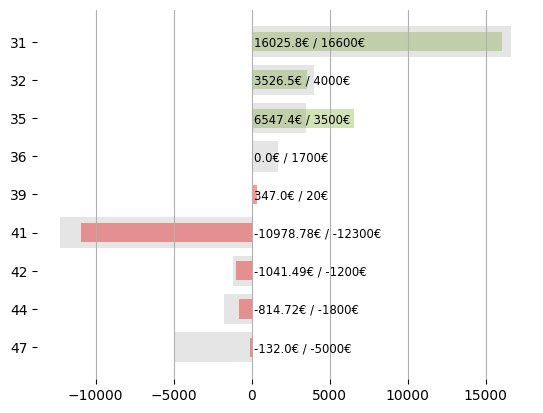

In [200]:
fig, ax = plt.subplots()

colors = ['#CCE0AC' if df.loc[idx,'Plan'] < 0 else '#FF8A8A' for idx in df.index]

ax.barh(np.arange(len(df)), df.Ist.iloc[::-1], alpha=0.9, color=colors, height=0.5)
ax.barh(np.arange(len(df)), df.Plan.iloc[::-1], alpha=0.2, color='grey', height=0.8)

ax.set_yticks(np.arange(len(df)))
labels1 = [account for account in accounts_ideell[::-1]]
ax.set_yticklabels(labels1)

labels2 = [f'{round(df.loc[account,"Ist"], 2)}€ / {round(df.loc[account,"Plan"], 2)}€' for account in accounts_ideell[::-1]]
for i in np.arange(len(df)):
    plt.annotate(labels2[i], (0,i), xytext=(150,i-0.12), fontsize='small')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.grid(axis='x')


In [5]:
booked

,Beleg Nr.,Datum,Konto,St0,St7,St19,Bezeichnung,Betrag+/-,Geldvermögen,Gewinn 2024,KSK,VoBa,TG,SB,Stand KsK,Stand VoBa,Stand TG,Stand SB,Kommentare
0,0,2024-01-01,NaN,NaN,NaN,NaN,Vortrag zum 01.01.2024,NaN,79829.11,0.00,NaN,NaN,NaN,NaN,10649.27,12320.21,26859.63,30000.0,NaN
1,1,2024-01-02,41.0,NaN,NaN,NaN,Einbruch- und Diebstahlversicherung,-35.05,79794.06,-35.05,NaN,1.0,NaN,NaN,10649.27,12285.16,26859.63,30000.0,NaN
2,2,2024-01-02,52.0,NaN,NaN,NaN,Habenzinsen Tagesgeld,0.01,79794.07,-35.04,NaN,NaN,1.0,NaN,10649.27,12285.16,26859.64,30000.0,"Nicht auf Kontoauszügen, da Tagesgeldkonto"
3,3,2024-01-08,807.0,NaN,NaN,NaN,Vorverkauf Helge Thun,380.00,80174.07,344.96,1.0,NaN,NaN,NaN,11029.27,12285.16,26859.64,30000.0,NaN
4,4,2024-01-11,601.0,NaN,NaN,NaN,Zahlung SchwimmFidel,1800.00,81974.07,2144.96,1.0,NaN,NaN,NaN,12829.27,12285.16,26859.64,30000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,179,2024-09-12,601.0,NaN,NaN,NaN,Zuschuss Schwimmfidel,1500.00,89654.11,9825.00,1.0,NaN,NaN,NaN,25233.65,6996.67,26858.79,30000.0,NaN
180,180,2024-09-12,67.0,NaN,NaN,NaN,Teilnahmegebühren Swim and Run Ehrets,-40.00,89614.11,9785.00,1.0,NaN,NaN,NaN,25193.65,6996.67,26858.79,30000.0,NaN
181,181,2024-09-12,32.0,NaN,NaN,NaN,Spende Teilnahmegebühren Ehrets,40.00,89654.11,9825.00,1.0,NaN,NaN,NaN,25233.65,6996.67,26858.79,30000.0,NaN
182,182,2024-09-16,67.0,NaN,NaN,NaN,Teilnahmegebühren Swim and Run Team Schmidgall,-40.00,89614.11,9785.00,1.0,NaN,NaN,NaN,25193.65,6996.67,26858.79,30000.0,NaN


In [22]:
df = booked['Betrag+/-']
df.index = booked['Datum']
df = df.groupby(pd.Grouper(freq='M')).sum()

/var/folders/hv/5rn9tnkj70x5xkjrsjhdxj9w0000gn/T/ipykernel_36358/1611397218.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.groupby(pd.Grouper(freq='M')).sum()


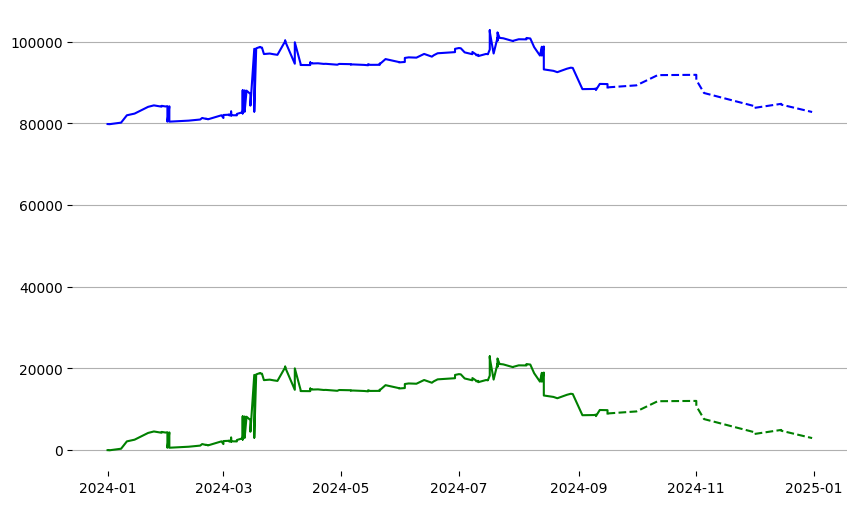

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

df = booked[['Datum', 'Geldvermögen', 'Gewinn 2024']]
df = df.sort_values(by='Datum')

ax.plot(df['Datum'], df['Gewinn 2024'], color='green')
ax.plot(df['Datum'], df['Geldvermögen'], color='blue')

df2 = pd.DataFrame(columns=['Datum', 'Geldvermögen', 'Gewinn'])
df2.loc[0,'Datum'] = df.loc[len(df)-1,'Datum']
df2.loc[0,'Geldvermögen'] = df.loc[len(df)-1,'Geldvermögen']
df2.loc[0,'Gewinn'] = df.loc[len(df)-1,'Gewinn 2024']

forecast = forecast.sort_values(by='Datum')

new_row = 1
for idx in range(len(forecast)):
    df2.loc[new_row,'Datum'] = forecast.iloc[idx,2]
    df2.loc[new_row,'Gewinn'] = df2.loc[new_row-1,'Gewinn'] + forecast.iloc[idx,3]
    df2.loc[new_row,'Geldvermögen'] = df2.loc[new_row-1,'Geldvermögen'] + forecast.iloc[idx,3]
    new_row += 1

ax.plot(df2['Datum'], df2['Gewinn'], linestyle='--', color='green')
ax.plot(df2['Datum'], df2['Geldvermögen'], linestyle='--', color='blue')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.grid(axis='y')
